In [ ]:
!mkdir plots

In [ ]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

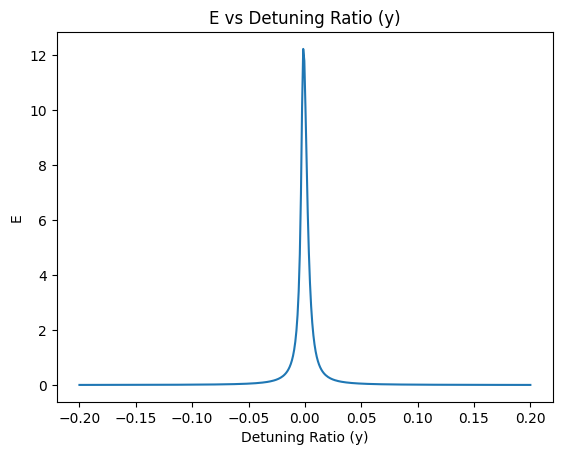

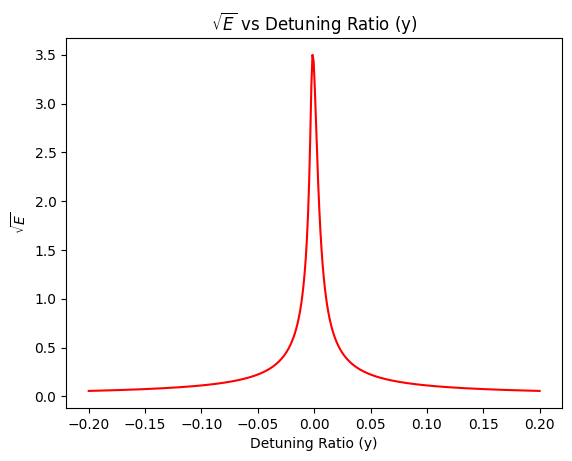

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Constants
w0 = 100e9  # 100 GHz
K = -9.99e-5* w0
r = 0.0032 * w0

# Function to define the equation for E
def equation(E, y, w0, K, r):
    term1 = (2 * y * w0 * E**2) / K
    term2 = (y**2 * w0**2 + r**2) * E / K**2
    term3 = 2 * r**3 / (3**(3/2) * K**2 * abs(K))
    return E**3 - term1 + term2 - term3

# Generate y values
y_values = np.linspace(-0.2, 0.2, 400)
# y= w_0-w_p/w_0
# E = B**2

# Solve for E for each y value
E_values = []
sqrt_E_values = []
for y in y_values:
    E_initial_guess = 0  # Initial guess for E
    E_solution = fsolve(equation, E_initial_guess, args=(y, w0, K, r))[0]
    E_values.append(E_solution)
    sqrt_E_values.append(E_solution ** 0.5)
# Plotting E vs y
plt.plot(y_values, E_values)
plt.xlabel('Detuning Ratio (y)')
plt.ylabel('E')
plt.title('E vs Detuning Ratio (y)')
plt.grid(False)
plt.savefig('/content/plots/E_vs_y.png', dpi=300, facecolor='white')
plt.show()

# Plot for sqrt(E) vs y
plt.plot(y_values, sqrt_E_values, label="√E", color='red')
plt.xlabel('Detuning Ratio (y)')
plt.ylabel(r'$\sqrt{E}$')
plt.title(r'$\sqrt{E}$ vs Detuning Ratio (y)')
plt.grid(False)
plt.savefig('/content/plots/sqrt_E_vs_y.png', dpi=300, facecolor='white')
plt.show()


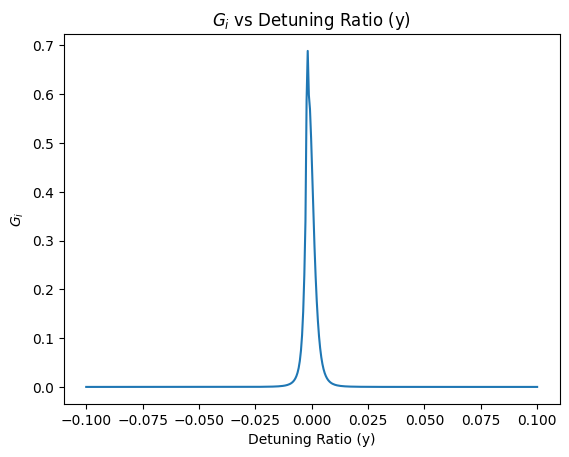

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Constants
w0 = 100e9  # 100 GHz
K = -9.99e-5* w0
r = 0.0032 * w0

# Function to define the equation for E
def equation(E, y, w0, K, r):
    term1 = (2 * y * w0 * E**2) / K
    term2 = (y**2 * w0**2 + r**2) * E / K**2
    term3 = 2 * r**3 / (3**(3/2) * K**2 * abs(K))
    return E**3 - term1 + term2 - term3

# Generate y values (detuning ratio)
y_values = np.linspace(-0.1, 0.1, 400)

# Solve for E and calculate Gi for each y value
Gi_values = []
E_initial_guess = 0.1  # Start with a small non-zero initial guess

for y in y_values:
    # Solve the cubic equation for E
    E_solution = fsolve(equation, E_initial_guess, args=(y, w0, K, r))[0]

    # Calculate sqrt_term, lambda_0, lambda_1, |V|^2, and Gi
    sqrt_term = np.sqrt(np.maximum(0, K**2 * E_solution**2 - (-y * w0 + 2 * K * E_solution)**2))
    lambda_0 = r - sqrt_term
    lambda_1 = r + sqrt_term

    # Ensure that lambda_0 and lambda_1 are real and positive
    if lambda_0 <= 0 or lambda_1 <= 0:
        Gi_values.append(np.nan)
    else:
        V_squared = K**2 * (np.abs(E_solution))**2
        Gi = (4 * r**2 * V_squared) / (lambda_1**2 * lambda_0**2)
        Gi_values.append(Gi)

    # Update initial guess for the next iteration
    E_initial_guess = E_solution

# Plotting Gi vs y
plt.plot(y_values, Gi_values)
plt.xlabel('Detuning Ratio (y)')
plt.ylabel(r'$G_i$')
plt.title(r'$G_i$ vs Detuning Ratio (y)')
plt.grid(False)
plt.savefig('/content/plots/Gi_vs_y.png', dpi=300, facecolor='white')
plt.show()


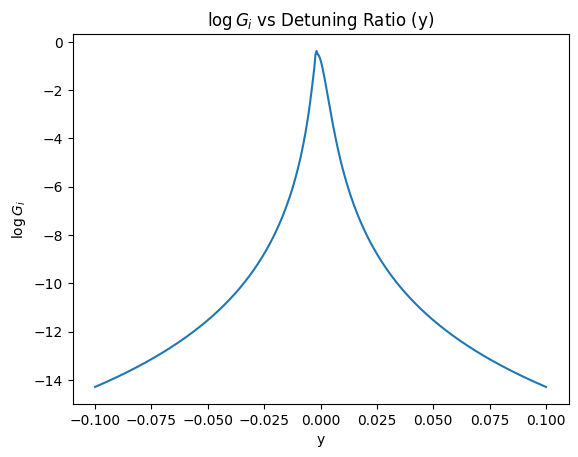

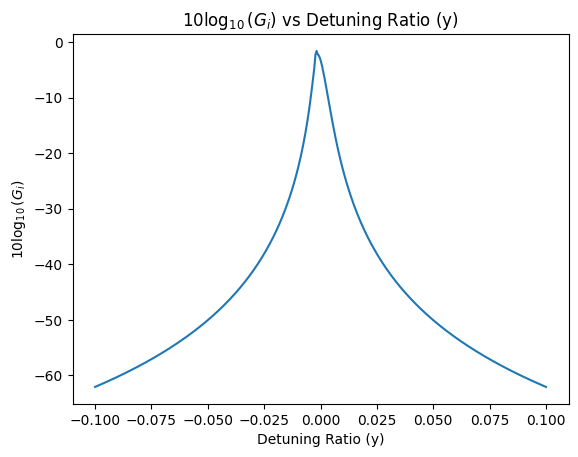

In [ ]:
# Convert Gi values to log(Gi), ignoring NaN values
log_Gi_values = np.log(Gi_values)

# Plotting log(Gi) vs y
plt.plot(y_values, log_Gi_values)
plt.xlabel('y')
plt.ylabel(r'$\log{G_i}$')
plt.title(r'$\log{G_i}$ vs Detuning Ratio (y)')
plt.grid(False)
plt.savefig('/content/plots/log(Gi)_vs_y.png', dpi=300, facecolor='white')
plt.show()

log_Gi_values = 10 * np.log10(np.array(Gi_values))

# Plotting 10log10(Gi) vs y
plt.plot(y_values, log_Gi_values)
plt.xlabel('Detuning Ratio (y)')
plt.ylabel(r'$10 \log_{10}(G_i)$')
plt.title(r'$10 \log_{10}(G_i)$ vs Detuning Ratio (y)')
plt.grid(False)
plt.savefig('/content/plots/10log(Gi)_vs_y.png', dpi=300, facecolor='white')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/plots/Gs_vs_y.png'

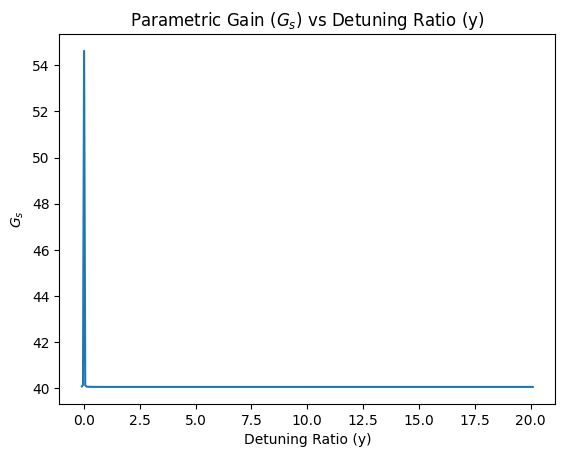

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Constants
w0 = 100e9  # 100 GHz
K = -9.99e-5* w0
gamma = 0.0032 * w0
wp = w0 * 1.01  # Example value for wp, 1% above w0

# Function to define the equation for E
def equation(E, y, w0, K, gamma):
    term1 = (2 * y * w0 * E**2) / K
    term2 = (y**2 * w0**2 + gamma**2) * E / K**2
    term3 = 2 * gamma**3 / (3**(3/2) * K**2 * abs(K))
    return E**3 - term1 + term2 - term3

# Function to calculate W
def calculate_W(E, wp, w0, gamma, K):
    return 1j * (wp - w0) + gamma - 2j * K * E

# Generate y values (detuning ratio)
y_values = np.linspace(-0.1, 20.1, 400)

# Solve for E and calculate Gs for each y value
Gs_values = []
E_initial_guess = 0.1  # Start with a small non-zero initial guess

for y in y_values:
    try:
        # Solve the cubic equation for E
        E_solution = fsolve(equation, E_initial_guess, args=(y, w0, K, gamma))[0]

        # Update initial guess for better convergence
        E_initial_guess = E_solution

        # Calculate sqrt_term, lambda_0, lambda_1
        sqrt_term = np.sqrt(np.maximum(0, K**2 * E_solution**2 - (-y * w0 + 2 * K * E_solution)**2))
        lambda_0 = gamma - sqrt_term
        lambda_1 = gamma + sqrt_term

        # Calculate W
        W = calculate_W(E_solution, wp, w0, gamma, K)

        # Ensure that lambda_0 and lambda_1 are real and positive
        if lambda_0.real <= 0 or lambda_1.real <= 0:
            Gs_values.append(np.nan)
        else:
            # Calculate Gs
            numerator = np.abs(lambda_0 * lambda_1 - 2 * gamma * W)**2
            denominator = (lambda_0 * lambda_1)**2
            Gs = numerator / denominator
            Gs_values.append(Gs.real)

    except Exception as e:
        # Handle any numerical errors or convergence issues
        Gs_values.append(np.nan)

# Plotting Gs vs y
plt.plot(y_values, Gs_values)
plt.xlabel('Detuning Ratio (y)')
plt.ylabel(r'$G_s$')
plt.title(r'Parametric Gain ($G_s$) vs Detuning Ratio (y)')
plt.grid(False)
plt.savefig('/content/plots/Gs_vs_y.png', dpi=300, facecolor='white')
plt.show()

log_Gs_values = 10 * np.log10(np.array(Gs_values))

# Plotting 10log10(Gs) vs y
plt.plot(y_values, log_Gs_values)
plt.xlabel('Detuning Ratio (y)')
plt.ylabel(r'$10 \log_{10}(G_s)$')
plt.title(r'$10 \log_{10}(G_s)$ vs Detuning Ratio (y)')
plt.grid(False)
plt.savefig('/content/plots/10log10(Gs)_vs_y.png', dpi=300, facecolor='white')
plt.show()

In [ ]:
!zip -r /content/plts.zip /content/plots

updating: content/plots/ (stored 0%)
updating: content/plots/Gi_vs_y.png (deflated 20%)
updating: content/plots/10log10(Gs)_vs_y.png (deflated 18%)
updating: content/plots/10log10(Gs)_vs_y.svg (deflated 76%)
updating: content/plots/sqrt_E_vs_y.svg (deflated 75%)
updating: content/plots/log(Gi)_vs_y.svg (deflated 75%)
updating: content/plots/Gs_vs_y.svg (deflated 75%)
updating: content/plots/10log(Gi)_vs_y.svg (deflated 76%)
updating: content/plots/log(Gi)_vs_y.png (deflated 14%)
updating: content/plots/10log(Gi)_vs_y.png (deflated 14%)
updating: content/plots/Gs_vs_y.png (deflated 18%)
updating: content/plots/sqrt_E_vs_y.png (deflated 18%)
updating: content/plots/Gi_vs_y.svg (deflated 76%)
updating: content/plots/E_vs_y.png (deflated 19%)
updating: content/plots/E_vs_y.svg (deflated 74%)


In [ ]:
from google.colab import files
files.download("/content/plts.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>